In [1]:

# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# lebel encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('../dataset/selected_dataset_cleaned.csv')
df.head()

,type,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city
0,condo for sale,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york
1,condo for sale,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york
2,co-op for sale,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria
3,co-op for sale,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria
4,co-op for sale,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

type             object
price             int64
beds              int64
bath            float64
propertysqft    float64
street_name      object
latitude        float64
longitude       float64
zip_code          int64
city             object
dtype: object

In [6]:
# we will not use street_name & city because they are confusing
# doing get dummies for type column
# df = pd.get_dummies(df, columns=['type'], drop_first= True)
df = pd.get_dummies(df, columns=['type'])

df.head()

,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york,0,1,0,0,0,0,0
1,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york,0,1,0,0,0,0,0
2,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria,1,0,0,0,0,0,0
3,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria,1,0,0,0,0,0,0
4,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria,1,0,0,0,0,0,0


In [7]:
df_work = df.drop(columns= ['street_name', 'city'])
df_work.head()

,price,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,50000000,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0,0,0,0,0
1,40000000,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0,0,0,0,0
2,169000,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0,0,0,0,0
3,199000,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0,0,0,0,0
4,225000,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0,0,0,0,0


# First we will try k-nearest neighbor regression

In [8]:
x = df_work.drop(columns = 'price')
y = df_work['price']
x.head()

,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0,0,0,0,0
1,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0,0,0,0,0
2,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0,0,0,0,0
3,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0,0,0,0,0
4,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0,0,0,0,0


In [9]:
y.head()

0    50000000
1    40000000
2      169000
3      199000
4      225000
Name: price, dtype: int64

In [10]:
# lets split data between test & train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

## Now we will scale the data

In [11]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled

array([[0.18181818, 0.09375   , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.03125   , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.03125   , 0.00465622, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18181818, 0.03125   , 0.01773653, ..., 0.        , 0.        ,
        0.        ],
       [0.54545455, 0.0625    , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.09375   , 0.02968659, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
x_test_scaled = scaler.fit_transform(X_test)
x_test_scaled

array([[0.45454545, 0.35294118, 0.13233508, ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 0.17647059, 0.06521466, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05882353, 0.01256545, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.09090909, 0.05882353, 0.01553927, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.05882353, 0.04050697, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.11764706, 0.03664921, ..., 0.        , 0.        ,
        0.        ]])

#Try k-nearest neighbor regression with k=5

knn_scale_5 = KNeighborsRegressor(n_neighbors = 5)
knn_scale_5.fit(x_train_scaled, y_train)

#make prediction based on knn_scale_5 model
y_test_scaled_pred = knn_scale_5.predict(x_test_scaled)
y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

#mean squared error finding
mse_test = mean_squared_error(y_test_scaled_pred, y_test)
print('scaled test data mse: ', mse_test)

mse_train = mean_squared_error(y_train_scaled_pred, y_train)
print('scaled Train data mse: ', mse_train)

In [13]:
# Best parameter (k)

lowest_mse_test_k = -1
lowest_mse_train_k = -1
lowest_mse_diff_k = -1
lowest_mse_test = lowest_mse_train = lowest_mse_diff = 999999999999999


for i in range(1, 10):
    
    knn_scale_best = KNeighborsRegressor(n_neighbors = i)
    knn_scale_best.fit(x_train_scaled, y_train)

    y_test_scaled_pred_best = knn_scale_best.predict(x_test_scaled)
    y_train_scaled_pred_best = knn_scale_best.predict(x_train_scaled)
    
    print('test result for k = ', i)
    mse_test_best = mean_squared_error(y_test_scaled_pred_best, y_test)
    print('scaled test data mse: ', mse_test_best)

    mse_train_best = mean_squared_error(y_train_scaled_pred_best, y_train)
    print('scaled Train data mse: ', mse_train_best)
    print('\n\n')
    
    if(mse_test_best < lowest_mse_test ):
        lowest_mse_test= mse_test_best
        lowest_mse_test_k = i
        
    if(mse_train_best < lowest_mse_train):
        lowest_mse_train= mse_train_best
        lowest_mse_train_k = i
        
    if((mse_test_best - mse_train_best) < lowest_mse_diff) :
        lowest_mse_diff_k = i
        
        
print('lowest_mse_test is found from k value = ', lowest_mse_test_k)
print('lowest_mse_train is found from k value = ', lowest_mse_train_k)
print('lowest_mse_diff is found from k value = ', lowest_mse_diff_k)

test result for k =  1
scaled test data mse:  21098752784298.72
scaled Train data mse:  1187610761.3578043



test result for k =  2
scaled test data mse:  11979439338422.312
scaled Train data mse:  2928417917651.684



test result for k =  3
scaled test data mse:  10723871503407.51
scaled Train data mse:  4543085895011.5



test result for k =  4
scaled test data mse:  9880308145335.314
scaled Train data mse:  5554979344107.236



test result for k =  5
scaled test data mse:  8910488115498.977
scaled Train data mse:  6495156295152.135



test result for k =  6
scaled test data mse:  8615877205926.87
scaled Train data mse:  6804591113669.958



test result for k =  7
scaled test data mse:  8534592779802.211
scaled Train data mse:  7322713174179.708



test result for k =  8
scaled test data mse:  8475026826014.961
scaled Train data mse:  7673625763058.148



test result for k =  9
scaled test data mse:  8630587322906.948
scaled Train data mse:  7769525676735.81



lowest_mse_test is fo

In [14]:
# Try k-nearest neighbor regression with k=5

knn_scale_best_all = KNeighborsRegressor(n_neighbors = 8)
knn_scale_best_all.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=8)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# make prediction based on knn_scale_5 model
# y_test_scaled_pred = knn_scale_9.predict(x_test_scaled)
# y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

# Make predictions on the test set
predictions = knn_scale_best_all.predict(x_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median House Price: {median_price}')

if rmse < median_price:
    print("RMSE is less than Median House Price")
else:
    print("RMSE is greater than or equal to Median House Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 8475026826014.961
Root Mean Squared Error: 2911189.933002476
Median House Price: 799000.0
RMSE is greater than or equal to Median House Price
Mean Absolute Error: 1114622.495084811
R-squared Score: 0.495720


In [16]:

from sklearn.inspection import permutation_importance

    
# Compute permutation importances
result = permutation_importance(knn_scale_best_all, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# Sort feature importances
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importances
for idx in sorted_idx:
    print(f"Feature index: {idx}, Importance: {feature_importance[idx]}")

Feature index: 0, Importance: 0.4066386729211337
Feature index: 5, Importance: 0.382555710727155
Feature index: 3, Importance: 0.14118053372480763
Feature index: 1, Importance: 0.06242680604257679
Feature index: 4, Importance: 0.05393953487842442
Feature index: 6, Importance: 0.03511950532205137
Feature index: 12, Importance: 0.03344838075946814
Feature index: 2, Importance: 0.02012379570481475
Feature index: 10, Importance: 0.013287815950911497
Feature index: 7, Importance: 0.007058607282443829
Feature index: 11, Importance: -0.0012267057759221323
Feature index: 8, Importance: -0.005701785602163156
Feature index: 9, Importance: -0.012475726941540555


In [17]:
# Assuming x_train_scaled is your original feature matrix
feature_names = x.columns

# Print feature importances with feature names
for idx in sorted_idx:
    print(f"Feature: {feature_names[idx]}, Importance                 : {feature_importance[idx]}")

Feature: beds, Importance                 : 0.4066386729211337
Feature: zip_code, Importance                 : 0.382555710727155
Feature: latitude, Importance                 : 0.14118053372480763
Feature: bath, Importance                 : 0.06242680604257679
Feature: longitude, Importance                 : 0.05393953487842442
Feature: type_co-op for sale, Importance                 : 0.03511950532205137
Feature: type_townhouse for sale, Importance                 : 0.03344838075946814
Feature: propertysqft, Importance                 : 0.02012379570481475
Feature: type_multi-family home for sale, Importance                 : 0.013287815950911497
Feature: type_condo for sale, Importance                 : 0.007058607282443829
Feature: type_pending, Importance                 : -0.0012267057759221323
Feature: type_contingent, Importance                 : -0.005701785602163156
Feature: type_house for sale, Importance                 : -0.012475726941540555


# Risiduals

In [18]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
0,50000000,1.623562e+07,3.376438e+07
1212,1750000,4.169625e+06,-2.419625e+06
1420,210000,1.162069e+06,-9.520688e+05
3776,790000,1.056270e+06,-2.662695e+05
893,799000,9.517500e+05,-1.527500e+05
1019,219000,2.708624e+05,-5.186238e+04
1160,169000,5.231734e+05,-3.541734e+05
3573,475000,8.188498e+05,-3.438498e+05
1857,875000,1.592250e+06,-7.172500e+05
2469,1595000,1.236862e+07,-1.077362e+07


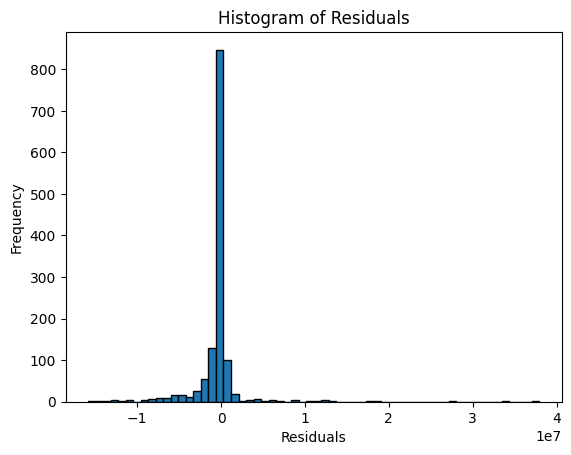

Average of Residuals: -377897.8715304549
Average of Absolute Residuals: 1114622.495084811


In [19]:
import matplotlib.pyplot as plt


# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')

# Now we will try using less variables

In [20]:
x = df_work.drop(columns = ['price', 'type_contingent', 'type_pending', 'type_multi-family home for sale', 'type_house for sale'])
y = df_work['price']
x.head()

,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_townhouse for sale
0,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0
1,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0
2,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0
3,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0
4,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0


In [21]:
y.head()

0    50000000
1    40000000
2      169000
3      199000
4      225000
Name: price, dtype: int64

In [22]:
# lets split data between test & train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

## Now we will scale the data

In [23]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled

array([[0.27272727, 0.125     , 0.05366907, ..., 0.        , 0.        ,
        1.        ],
       [0.36363636, 0.09375   , 0.02766163, ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.125     , 0.02968659, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27272727, 0.0625    , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.125     , 0.03605508, ..., 1.        , 0.        ,
        0.        ],
       [0.09090909, 0.0625    , 0.01519398, ..., 0.        , 0.        ,
        0.        ]])

In [24]:
x_test_scaled = scaler.fit_transform(X_test)
x_test_scaled

array([[0.36363636, 0.2       , 0.02718325, ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.2       , 0.03346597, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.1       , 0.03212565, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.36363636, 0.4       , 0.04050697, ..., 0.        , 0.        ,
        1.        ],
       [0.09090909, 0.        , 0.04050697, ..., 1.        , 0.        ,
        0.        ],
       [0.18181818, 0.2       , 0.03246073, ..., 0.        , 0.        ,
        0.        ]])

#Try k-nearest neighbor regression with k=5

knn_scale_5 = KNeighborsRegressor(n_neighbors = 5)
knn_scale_5.fit(x_train_scaled, y_train)

#make prediction based on knn_scale_5 model
y_test_scaled_pred = knn_scale_5.predict(x_test_scaled)
y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

#mean squared error finding
mse_test = mean_squared_error(y_test_scaled_pred, y_test)
print('scaled test data mse: ', mse_test)

mse_train = mean_squared_error(y_train_scaled_pred, y_train)
print('scaled Train data mse: ', mse_train)

In [25]:
# Best parameter (k)

lowest_mse_test_k = -1
lowest_mse_train_k = -1
lowest_mse_diff_k = -1
lowest_mse_test = lowest_mse_train = lowest_mse_diff = 999999999999999


for i in range(1, 10):
    
    knn_scale_best = KNeighborsRegressor(n_neighbors = i)
    knn_scale_best.fit(x_train_scaled, y_train)

    y_test_scaled_pred_best = knn_scale_best.predict(x_test_scaled)
    y_train_scaled_pred_best = knn_scale_best.predict(x_train_scaled)
    
    print('test result for k = ', i)
    mse_test_best = mean_squared_error(y_test_scaled_pred_best, y_test)
    print('scaled test data mse: ', mse_test_best)

    mse_train_best = mean_squared_error(y_train_scaled_pred_best, y_train)
    print('scaled Train data mse: ', mse_train_best)
    print('\n\n')
    
    if(mse_test_best < lowest_mse_test ):
        lowest_mse_test= mse_test_best
        lowest_mse_test_k = i
        
    if(mse_train_best < lowest_mse_train):
        lowest_mse_train= mse_train_best
        lowest_mse_train_k = i
        
    if((mse_test_best - mse_train_best) < lowest_mse_diff) :
        lowest_mse_diff_k = i
        
        
print('lowest_mse_test is found from k value = ', lowest_mse_test_k)
print('lowest_mse_train is found from k value = ', lowest_mse_train_k)
print('lowest_mse_diff is found from k value = ', lowest_mse_diff_k)

test result for k =  1
scaled test data mse:  20401651190539.453
scaled Train data mse:  1227712966.2698412



test result for k =  2
scaled test data mse:  11051852614594.795
scaled Train data mse:  3439609104041.0913



test result for k =  3
scaled test data mse:  9232375562884.617
scaled Train data mse:  4714234113825.695



test result for k =  4
scaled test data mse:  8074371231060.793
scaled Train data mse:  5643993956425.366



test result for k =  5
scaled test data mse:  7289508299831.829
scaled Train data mse:  6407404942950.082



test result for k =  6
scaled test data mse:  6617990563800.179
scaled Train data mse:  7003917371732.958



test result for k =  7
scaled test data mse:  6331518436790.093
scaled Train data mse:  7605721170420.698



test result for k =  8
scaled test data mse:  5797633944270.253
scaled Train data mse:  8006656927838.59



test result for k =  9
scaled test data mse:  5380247523022.06
scaled Train data mse:  8301964965997.443



lowest_mse_test i

In [26]:
# Try k-nearest neighbor regression with k= 9

knn_scale_best_few = KNeighborsRegressor(n_neighbors = 9)
knn_scale_best_few.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
predictions = knn_scale_best_few.predict(x_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median House Price: {median_price}')

if rmse < median_price:
    print("RMSE is less than Median House Price")
else:
    print("RMSE is greater than or equal to Median House Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 5380247523022.06
Root Mean Squared Error: 2319536.0577111235
Median House Price: 838000.0
RMSE is greater than or equal to Median House Price
Mean Absolute Error: 908282.8099888632
R-squared Score: 0.508570


In [28]:

from sklearn.inspection import permutation_importance

    
# Compute permutation importances
result = permutation_importance(knn_scale_best_few, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# Sort feature importances
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importances
for idx in sorted_idx:
    print(f"Feature index: {idx}, Importance: {feature_importance[idx]}")

Feature index: 0, Importance: 0.8612750543729828
Feature index: 5, Importance: 0.7261290024320133
Feature index: 3, Importance: 0.2356776381161902
Feature index: 6, Importance: 0.14864137185026607
Feature index: 1, Importance: 0.14735202150596632
Feature index: 8, Importance: 0.09810683622072758
Feature index: 4, Importance: 0.08348588187303782
Feature index: 7, Importance: 0.0578033958521865
Feature index: 2, Importance: 0.021148074085925783


In [29]:
# Assuming x_train_scaled is your original feature matrix
feature_names = x.columns

# Print feature importances with feature names
for idx in sorted_idx:
    print(f"Feature: {feature_names[idx]}, Importance                 : {feature_importance[idx]}")

Feature: beds, Importance                 : 0.8612750543729828
Feature: zip_code, Importance                 : 0.7261290024320133
Feature: latitude, Importance                 : 0.2356776381161902
Feature: type_co-op for sale, Importance                 : 0.14864137185026607
Feature: bath, Importance                 : 0.14735202150596632
Feature: type_townhouse for sale, Importance                 : 0.09810683622072758
Feature: longitude, Importance                 : 0.08348588187303782
Feature: type_condo for sale, Importance                 : 0.0578033958521865
Feature: propertysqft, Importance                 : 0.021148074085925783


# Risiduals

In [30]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
448,1249000,1.919099e+06,-6.700987e+05
3165,1199000,1.304778e+06,-1.057778e+05
903,2995000,4.902444e+06,-1.907444e+06
1381,129000,1.566111e+05,-2.761111e+04
1494,1389000,7.862778e+05,6.027222e+05
4197,999000,9.586556e+05,4.034444e+04
4239,1650000,1.934111e+06,-2.841110e+05
2290,645000,1.822667e+06,-1.177667e+06
2121,750000,9.036667e+05,-1.536667e+05
4097,699000,1.011778e+06,-3.127778e+05


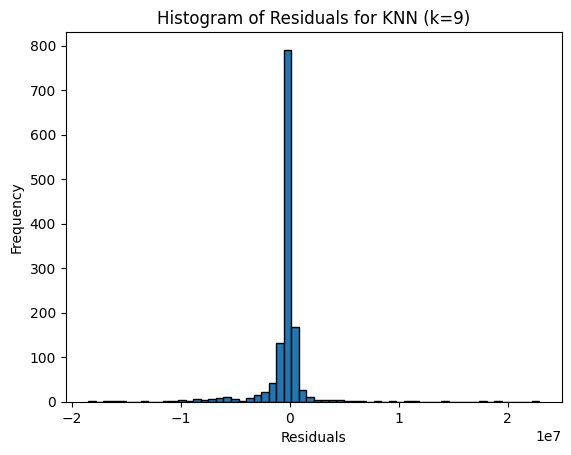

Average of Residuals: -415172.9931465776
Average of Absolute Residuals: 908282.8099888632


In [32]:
import matplotlib.pyplot as plt


# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals for KNN (k=9)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')